<a href="https://colab.research.google.com/github/eunseochu/OB_11th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **8) 파이썬 추천 시스템 패키지 - Surprise**

#### **8-1) Surprise 패키지 소개** 
Surprise는 파이썬 기반에서 사이킷런과 유사한 API와 프레임워크를 제공
- 다양한 추천 알고리즘, 예를 들어 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, <br/> NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용해 추천 시스템을 구축할 수 있음
- 핵심 API가 사이킷런의 핵심 API와 유사한 API 명으로 작성됨
  - fit(), predict() API로 추천 데이터 학습과 예측
  - train_test_split()으로 추천 학습 데이터 세트와 예측 데이터 세트 분리
  - cross_validate(), GridSearchCV 클래스를 통해 <br/> 추천 시스템을 위한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등의 기능 제공


#### **8-2) Surprise를 이용한 추천 시스템 구축**
추천 데이터를 학습용과 테스트용 데이터 세트로 분리한 뒤 SVD 행렬 분해를 통한 잠재 요인 협업 필터링 수행 

In [2]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095432 sha256=fe657c65b386a4dc1cf2d3205089067bf86d221fab88cc145b29796b2e8f27f8
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


**Surprise의 관련 모듈 임포트**

In [3]:
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

**내장 데이터를 로드하고 학습과 테스트 데이터로 분리**
- Surprise에서 데이터 로딩은 Dataset 클래스를 이용해서만 가능
  - 주요 데이터가 로우(Row) 레벨 형태로 돼 있는 포멧의 데이터만 처리
  - ex. Movie Lens 데이터 세트의 사용자-영화 평점 데이터 포맷
- MovieLens 사이트에서 제공하는 과거 버전의 데이터 세트를 가져오는 API 제공
  - load_bulletin()은 MovieLens 사이트에서 제공하는 과거 버전 데이터 세트인 <br/> 'ml-100k'(10만 개 평점 데이터) 또는 'ml=1m'(100만 개 평점 데이터) 데이터를 로딩
  - 로딩한 데이터 세트를 train_test_split() API를 이용해 학습 데이터 세트와 테스트 데이터 세트로 분리

In [4]:
data = Dataset.load_builtin('ml-100k') 
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


**추천 행렬 분해 알고리즘으로 SVD객체를 생성하고 학습수행**
- 알고리즘 객체를 생성한 뒤, fit을 수행해 학습 데이터 세트 기반으로 추천 알고리즘을 학습

In [5]:
algo = SVD()
algo.fit(trainset) 

**테스트 데이터 세트에 예상 평점 데이터 예측 - test**
- test()는 사용자-아이템 평점 데이터 세트 전체에 대해서 추천을 예측하는 메서드
  - 입력된 데이터 세트에 대해 추천 데이터 세트를 만들어줌
  - test 메소드 호출 시 Prediction 객체의 리스트로 평점 예측 데이터 반환
- predict()는 개별 사용자와 영화에 대한 추천 평점을 반환

In [6]:
predictions = algo.test(testset)
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.295471538086834, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.676667712185077, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=3.871932840109107, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.5393473996121316, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.536756037436474, details={'was_impossible': False})]

- SVD 알고리즘 객체의 test 메서드 호출 결과는 파이썬 리스트
- 크기는 입력 인자 데이터 세트의 크기와 같은 25,000개
- 호출 결과로 반환된 리스트 객체는 25,000개의 Prediction 객체를 내부에 가지고 있음
  - Prediction 객체는 Surprise 패키지에서 제공하는 데이터 타입
  - 개별 사용자 아이디(uid), 영화(또는 아이템) 아이디(iid)와 실제 평점(r_ui) 정보에 기반해 <br/> Surprise의 추천 예측 평점 데이터를 튜플 형태로 가지고 있음
  - details 속성은 내부 처리 시 추천 예측을 할 수 없는 경우에 로그용으로 데이터를 남기는 데 사용
  - 'was_impossible'이 True면 에측값을 생성할 수 없는 데이터라는 의미

**Prediction 객체에서 속성 추출** <Br/>
Prediction 객체의 uid, iid, r_ui, est 등의 속성에 접근하려면 객체명.uid와 같은 형식으로 가능

In [8]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('120', '282', 3.295471538086834),
 ('882', '291', 3.676667712185077),
 ('535', '507', 3.871932840109107)]

**테스트 데이터 세트에 예상 평점 데이터 예측 - predict** <br/>
predict()는 개별 사용자의 아이템에 대한 추천 평점을 예측
- 인자로 개별 사용자 아이디, 아이템 아이디를 입력하면 추천 예측 평점을 포함한 정보를 반환
- 기본 평점 정보는 선택 사항이며, 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함

In [9]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력해야 함. 
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.21   {'was_impossible': False}


- predict()는 개별 사용자와 아이템 정보를 입력하면 추천 예측 평점을 est로 반환
- test() 메서드는 입력 데이터 세트의 모든 사용자와 아이템 아이디에 대해 predict()를 반복적으로 수행한 결과

**추천 예측 평점과 실제 평점과의 차이 평가** <Br/>
Surprise의 accuracy 모듈은 RMSE, MSE 등의 방법으로 추천 시스템의 성능 평가 정보를 제공
- rmse()를 이용해 RMSE 평가 결과를 확인

In [10]:
accuracy.rmse(predictions)

RMSE: 0.9497


0.949704139818634

#### **8-3) Surprise 주요 모듈 소개**

**Dataset** <br/>
user_id(사용자 아이디), item_id(아이템 아이디), rating(평점) 데이터가 로우 레벨로 된 데이터 세트만 적용 가능
- 데이터의 첫 번째 칼럼을 사용자 아이디, 두 번째 칼럼을 아이템 아이디, 세 번째 칼럼을 평점으로 가정해 로딩
- 네 번째 칼럼부터는 아예 로딩을 수행하지 않음

**Dataset API**
- Dataset.load_builtin(name='ml-100k')
  - 무비렌즈 아카이브 FTP 서버에서 무비렌즈 데이터를 내려 받음
  - ml-100k, ml-1M을 내려 받을 수 있음
  - 내려 받은 데이터는 .surprise_data 디렉터리 밑에 저장되고, <Br/> 해당 디렉터리에 데이터가 있으면 FTP에서 내려받지 않고 해당 데이터를 이용
  - 입력 파라미터인 name으로 대상 데이터가 ml-100k인지 ml-1m인지 입력 <br/> (디폴트는 ml-100k)
- Dataset.load_from_file(file_path, reader)
  - OS 파일에서 데이터를 로딩할 때 사용
  - 콤마, 탭 등으로 칼럼이 분리된 포맷의 OS 파일에서 데이터를 로딩
  - 입력 파라미터로 OS 파일명, Reader로 파일의 포맷을 지정
- Dataset.load_from_df(df, reader)
  - 판다스의 DataFrame에서 데이터를 로딩
  - 파라미터로 DataFrame을 입력 받으며, DataFrame 역시 반드시 3개의 칼럼인 <br/> 사용자 아이디, 아이템 아이디, 평점 순으로 칼럼 순서가 정해져 있어야 함
  - 입력 파라미터로 DataFrame 객체, Reader로 파일의 포맷을 지정

**OS 파일 데이터를 Surprise 데이터 세트로 로딩** <br/>
Dataset.load_from_file API를 이용해 지정된 디렉터리에 있는 사용자-아이템 평점 데이터를 로딩
- 데이터 파일에 칼럼명을 가지는 헤더 문자열이 있어서는 안됨
- 판다스 DataFrame의 to_csv() 함수를 이용해 간단하게 이 칼럼 헤더를 삭제하고 새로운 파일로 저장

In [12]:
import pandas as pd

ratings = pd.read_csv('/content/ratings.csv')

# ratings_noh.csv 파일로 unload 시 index 와 header를 모두 제거한 새로운 파일 생성.  
ratings.to_csv('/content/ratings_noh.csv', index=False, header=False)

**Reader 클래스를 통해 데이터 파일의 파싱 포맷을 정의** <br/>
Reader 클래스는 로딩될 rating_noh.csv 파일의 파싱 정보를 알려주기 위해 사용
- rating_noh.csv는 칼럼 헤더가 없고, 4개의 칼럼이 콤마로만 분리되어 있음
- 4개의 칼럼이 사용자 아이디, 아이템 아이디, 평점, 타임스탬프임을 로딩할 때 알려줘야 함
- Reader 클래스의 생성자에 각 필드의 칼럼명가 칼럼 분리문자, 그리고 최소~최대 평점을 입력해 <br/> 객체를 생성하고, load_from_file()로 생성된 Reader 객체ㄹ르 참조해 데이터 파일을 파싱하면서 로딩
  - line_format 인자로 user, item, rating, timestamp의 4개의 칼럼으로 데이터가 구성돼 있음을 명시
  - 각 칼럼의 분리 문자는 콤마, 평점의 단위는 0.5, 최대 평점은 5점으로 설정
  - Reader 설정이 완료되면 Dataset.load_from_file()는 이를 기반으로 데이터를 파싱하며 로딩
  - 로딩 시 앞의 3개 칼럼만 로딩되고 timestamp 칼럼은 제외

In [13]:
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('/content/ratings_noh.csv',reader=reader)

**Reader 클래스의 주요 생성 파라미터**
- line_format(string): 칼럼을 순서대로 나열. 입력된 문자열을 공백으로 분리해 칼럼으로 인식
- sep(char): 칼럼을 분리하는 분리자
  - 디폴트는 '\t'
  - 판다스 DataFrame에서 입력받을 경우에는 기재할 필요가 없음
- rating_scale(tuple, optional): 평점 값의 최소 ~ 최대 평점을 설정
  - 디폴트는 (1,5)
  - rating.csv 파일의 경우는 최소 평점이 0.5, 최대 평점이 5이므로 (0.5, 5)로 설정

**SVD 행렬 분해 기법을 이용해 추천 예측**
- 잠재 요인 크기 K 값을 나타내는 파라미터인 n_factors를 50으로 설정
- 데이터를 학습한 뒤 테스트 데이터 세트르르 적용해 예측 평점을 구함
- 예측 평점과 실제 평점 데이터를 RMSE로 평가

In [14]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

# 수행시마다 동일한 결과 도출을 위해 random_state 설정 
algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

**판다스 DataFrame에서 Surprise 데이터 세트로 로딩** <br/>
DataFrame 역시 사용자 아이디, 아이템 아이디, 평점 칼럼 순서를 지켜야 함
- Dataset.load_from_df(ratings[['userID', 'movieID', 'rating']], reader)와 같이 파라미터 입력

In [16]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/ratings.csv') 
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

#### **8-4) Surprise 추천 알고리즘 클래스**
Surprise에서 추천 예측을 위해 자주 사용되는 추천 알고리즘 클래스는 다음과 같음
- SVD: 행렬 분해를 통한 잠재 요인 협업 필터링을 위한 SVD 알고리즘
- KNNBasic: 최근접 이웃 협업 필터링을 위한 KNN 알고리즘
- BaselineOnly: 사용자 Bias와 아이템 Bias를 감안한 SGD 베이스라인 알고리즘
- 이 밖에도 SVD++, NMF 등 다양한 유형의 알고리즘을 수행할 수 있음

**Surprise SVD의 비용 함수** <br/>
사용자 Baseline 편향성을 감안한 평점 예측에 Regularizaton을 적용한 것

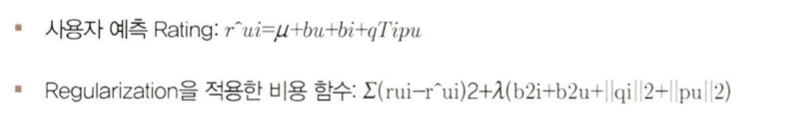

**SVD 클래스의 입력 파라미터** <br/>
주로 n_factors와 n_epochs의 값을 변경해 튜닝할 수 있으나 튜닝 효과는 크지 않음
- n_factors: 잠재 요인 K의 개수
  - 디폴트는 100
  - 커질 수록 정확도가 높아질 수 있으나 과적합 문제가 발생할 수 있음
- n_epochs: SGD(Stochastic Gradient Descent) 수행 시 반복 횟수
  - 디폴트는 20
- biased(bool): 베이스라인 사용자 편향 적용 여부
  - 디폴트는 True
  - 큰 이슈가 없는 한 디폴트인 True로 설정을 유지하는 것이 좋음

**추천 알고리즘의 예측 성능 벤치마크 결과** <br/>

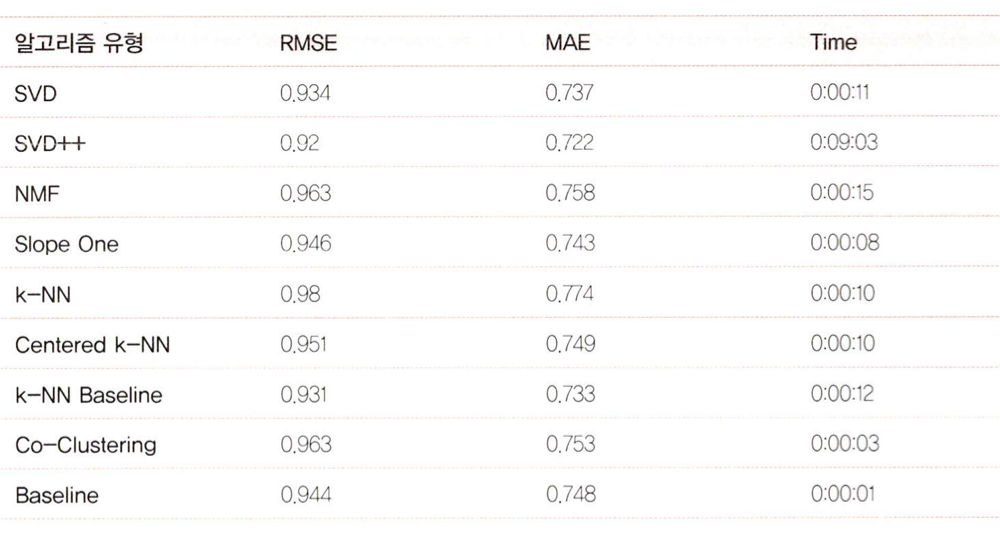

- SVD++ 알고리즘의 RMSE, MAE 성적이 가장 좋음
  - 상대적으로 시간이 너무 오래 걸려 데이터가 조금만 더 커져도 사용하기가 어려울 것으로 보임
  - SVD++를 제외하면 SVD와 K-NN Baseline이 가장 성능 평가 수치가 좋음
- K-NN 자체는 성능이 상대적으로 뒤지지만 Baseline을 결합한 경우 성능 평가 수치가 대폭 향상
- Baseline은 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식

#### **8-5) 베이스라인 평점**
- 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것
- 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수 공식으로 계산
  - 전체 평균 평점: 모든 사용자의 아이템에 대한 평점을 평균한 값
  - 사용자 편향 점수: 사용자별 아이템 평점 평균의 값 - 전체 평균 평점
  - 아이템 편향 점수: 아이템별 평점 평균 값 - 전체 평균 평점

#### **8-6) 교차 검증과 하이퍼 파라미터 튜닝**
교차 검증과 하이퍼 파라미터 튜닝을 위해 사이킷런과 유사한 cross_validate()와 GridSearchCV 클래스 제공
- cross_validate()는 surprise.model_selection 모듈 내에 존재
- 폴드된 데이터 세트의 개수와 성능 측정 방법을 명시해 교차 검증을 수행

**cross_validate()를 이용한 교차 검증** <br/>
5개의 학습/검증 폴드 데이터 세트로 분리해 교차 검증을 수행하고 RMSE, MAE로 성능 평가를 진행
- 알고리즘 객체, 데이터, 성능 평가 방법, 폴드 데이터 세트 개수를 인자로 입력

In [19]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('/content/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8769  0.8680  0.8737  0.8677  0.8737  0.8720  0.0036  
MAE (testset)     0.6728  0.6662  0.6708  0.6683  0.6713  0.6699  0.0023  
Fit time          1.71    2.19    1.58    1.72    2.33    1.91    0.30    
Test time         0.13    0.44    0.13    0.24    0.14    0.22    0.12    


{'test_rmse': array([0.87693624, 0.86804651, 0.87373035, 0.86767881, 0.87371261]),
 'test_mae': array([0.67280505, 0.66622287, 0.67079667, 0.66829134, 0.67132773]),
 'fit_time': (1.708808422088623,
  2.1910502910614014,
  1.5846059322357178,
  1.7195603847503662,
  2.3285973072052),
 'test_time': (0.13429522514343262,
  0.4382297992706299,
  0.12633776664733887,
  0.2439875602722168,
  0.13914752006530762)}

- 폴드별 성능 평가 수치와 전체 폴드의 평균 성능 평가 수치를 함꼐 보여줌

**GridSearchCV을 이용한 교차 검증** <br/>
사이킷런의 GridSearchCV와 유사하게 교차 검증을 통한 하이퍼 파라미터 최적화를 수행
- SVD의 경우 SGD의 반복 횟수를 지정하는 n_epoch와 잠재 요인 K의 크기를 지정하는 n_factors를 튜닝
- 'n_epohcs' : [20, 40, 60], 'n_factors': [50, 100, 200]으로 변경하며 CV 3의 최적 하이퍼 파라미터 도출

In [20]:
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8763394317244835
{'n_epochs': 20, 'n_factors': 50}


#### **8-7) Surprise를 이용한 개인화 영화 추천 시스템 구축**
추천 알고리즘을 기반으로 특정 사용자가 아직 평점을 매기지 않은 영화 중 개인 취향에 가장 적절한 영화를 추천

**Surprise의 학습 데이터** <br/>
train_test_split()을 이용해 내부에서 사용하는 TrainSet 클래스 객체로 변환하지 않으면 fit()을 통해 학습할 수 없음

In [21]:
# 아래 코드는 train_test_split( )으로 분리되지 않는 Dataset에 fit( )을 호출하여 오류를 발생합니다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

**DatasetAutoFolds를 이용한 전체 데이터를 TrainSet클래스 변환** <br/>
build_full_trainset() 메서드를 호출하면 전체 데이터를 학습 데이터 세트로 만들 수 있음

In [23]:
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='/content/ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

**SVD로 학습 수행** 

In [24]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

**특정 사용자의 아직 보지 않은 영화 목록 확인**
- userID = 9인 사용자로 지정
- userID 9가 아직 평점을 매기지 않은 영화를 movieID 42로 선정한 뒤 예측 평점을 계산

In [27]:
# 영화에 대한 상세 속성 정보 DataFrame로딩
movies = pd.read_csv('/content/movies.csv')

# userId=9 의 movieId 데이터 추출하여 movieId=42 데이터가 있는지 확인. 
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


**추천 예상 평점 확인** <br/>
movieID 42인 영화에 대해 userID 9 사용자의 추천 예상 평점은 predict() 메서드를 이용하면 알 수 있음
- 학습된 SVD 객체에서 predict() 메서드 내에 userID와 movieID 값을 입력해주면 됨
- 이 값은 모두 문자열 값이어야 함

In [28]:
uid = str(9)
iid = str(42)

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


- 추천 예측 평점은 est 값으로 3.13

**추천 대상이 되는 영화 추출** <br/>
get_unseen_surprise() 함수를 만들고 이를 이용해 아이디 9인 사용자가 아직 평점을 매기지 않은 영화 정보를 반환

In [29]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


- 전체 9742개의 영화 중에서 46개만 평점을 매김
- 추천 대상 영화는 9696개이며, 이 중 SVD를 이용해 높은 예측 평점을 가진 순으로 영화를 추천

**recomm_movie_by_surprise() 함수로 영화 추천** <br/>
- recomm_movie_by_surprise()는 인자로 학습이 완료된 추천 알고리즘 객체, 추천 대상 사용자 아이디, <br/> 추천 대상 영화의 리스트 객체, 그리고 추천 상위 N개 개수를 받음
- 추천 대상 영화 모두를 대상으로 추천 알고리즘 객체의 predict() 메서드를 호출하고, <br/>  그 결과인 Prediction 객체를 리스트 객체로 저장
- 저장된 리스트 내부의 Prediction 객체를 예측 평점이 높은 순으로 다시 정렬한 뒤, <br/> TOP-N개의 Prediction 객체에서 영화 아이디, 영화 제목, 예측 평점 정보를 추출해 반환

In [30]:
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122657
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


- 브래드 피트 주연의 '세븐'과 케빈 스페이시 주연의 '유주얼 서스펙트', 그리고 '대부'와 '좋은 친구들' 같은 <br/> 서스펜스/스릴러/범죄 영화 및 스타워즈와 같은 액션 영화 등이 주로 추천됨